In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [66]:
# Import data
df = pd.read_csv("../data/medical_examination.csv")

In [67]:
# Add 'overweight' column

# df['overweight'] = df["weight"] / (df["height"]/100)**2 >25
# df['overweight'] = df["overweight"].replace({True : 1, False: 0})

df ["overweight"] = (df["weight"]/(df["height"]/100)**2 >25).apply(lambda x: 1 if x else 0)

In [72]:
# Normalize data by making 0 always good and 1 always bad. 
# If the value of 'cholesterol' or 'gluc' is 1, make the value 0. 
# If the value is more than 1, make the value 1.

"""Run only once"""
#df["cholesterol"] = df["cholesterol"].apply(lambda x: 0 if x==1 else 1)
#df["gluc"] = df["gluc"].apply(lambda x : 0 if x==1 else 1)
df


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


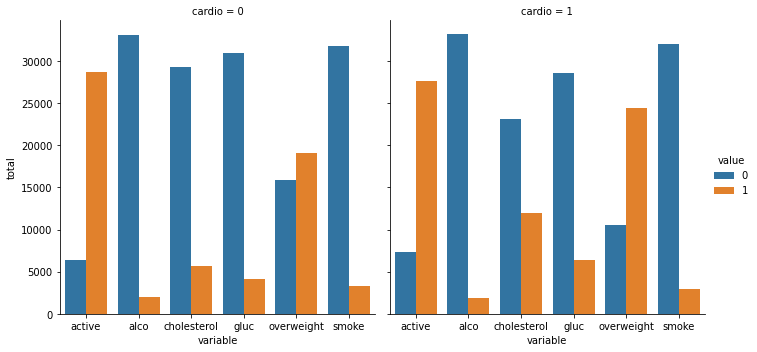

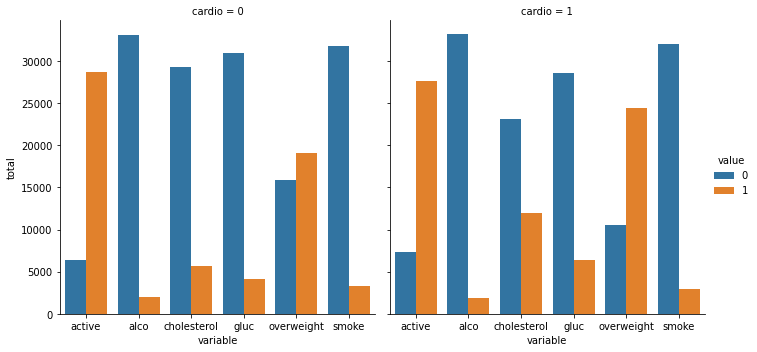

In [70]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars=["cardio"], value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"],)
    df_cat["total"]=1

    df_cat = df_cat.groupby(["cardio","variable","value"],as_index= False).count()
    fig = sns.catplot( kind="bar", x="variable", y="total",col="cardio", data = df_cat, hue= "value").fig
    
    fig.savefig('catplot.png')
    return fig


draw_cat_plot()


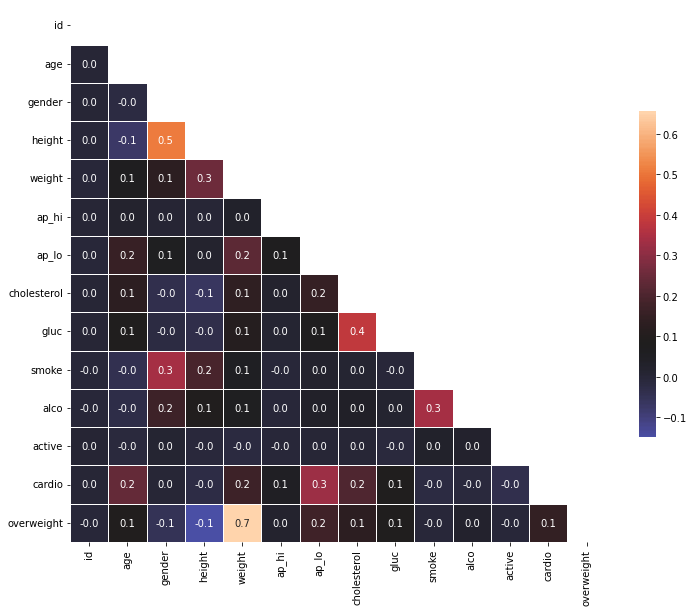

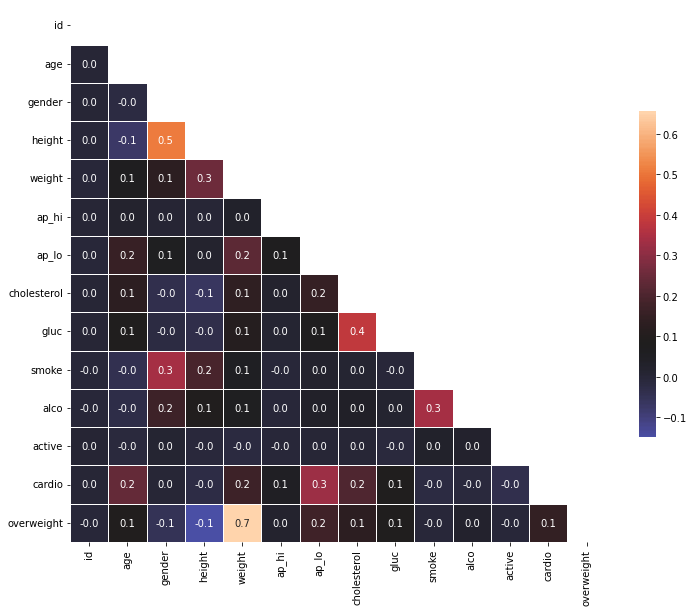

In [71]:
# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) & 
        (df['height'] >= df['height'].quantile(0.025))&
        (df['height'] <= df['height'].quantile(0.975))&
        (df['weight'] >= df['weight'].quantile(0.025))&
        (df['weight'] <= df['weight'].quantile(0.975))
        
    ]
    
    # Calculate the correlation matrix
    corr = df_heat.corr(method="pearson")

    # Generate a mask for the upper triangle
    mask = np.triu(corr)
    
    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12,12))

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(corr, linewidths=1 , annot = True, square= True, mask = mask, fmt =".1f",center=0.08, cbar_kws={"shrink":0.5} )


    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

draw_heat_map()